In [1]:
import requests
from bs4 import BeautifulSoup
import pymongo
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


class Database(object):
    def __init__(self):
        self.connection = pymongo.MongoClient("localhost", 27017)
        self.db = self.connection["DSS4_SmallP"]
        self.collection = self.db["Movie_mojo"]
        
def Load_Data_mojo_yearly_dom(page,year):
    Mojo_url = u'http://www.boxofficemojo.com/'\
        u'yearly/chart/?page={}&view=releasedate&view2=domestic&yr={}&p=.htm'.format(page,year)
    return requests.get(Mojo_url)
def Load_Data_mojo_yearly_intl(year):
    Mojo_url = u'http://www.boxofficemojo.com/'\
        u'yearly/chart/?view2=worldwide&yr={}&p=.htm'.format(year)
    return requests.get(Mojo_url)

def Load_Data_mojo_movie_intl(M_id):
    Mojo_url = u'http://www.boxofficemojo.com{}&page=intl'.format(M_id)
    return requests.get(Mojo_url)



In [40]:
#DB없는버전

import requests
from bs4 import BeautifulSoup

def Load_Data_mojo_yearly_dom(page,year):
    Mojo_url = u'http://www.boxofficemojo.com/'\
        u'yearly/chart/?page={}&view=releasedate&view2=domestic&yr={}&p=.htm'.format(page,year)
    return requests.get(Mojo_url)
def Load_Data_mojo_yearly_intl(year):
    Mojo_url = u'http://www.boxofficemojo.com/'\
        u'yearly/chart/?view2=worldwide&yr={}&p=.htm'.format(year)
    return requests.get(Mojo_url)

dbs = {}
for year in range(2010, 2011) :
    res = Load_Data_mojo_yearly_intl(year)
    content = res.content
    soup = BeautifulSoup(content,'html.parser')
    table = soup.find('table', attrs = {'cellpadding': '5'})
    trs = table.find_all('tr')
    for line in trs[2:-1] :
        arr_m = line.find_all('td')
        dbs[arr_m[1].get_text()] = {
            'Mname' : arr_m[1].get_text(), 
            'Domestic' : arr_m[4].get_text(), 
            'Oversea' : arr_m[6].get_text(),
            'Webpage' : arr_m[1].a.get('href'),
            'year' : year
        }
        
        

In [17]:
#dbs = Database()
#dbq = dbs.collection.find({"year": {"$eq":2010},"budget" : { "$exists" : False }})

import time

def Load_Data_mojo_movie_intl(M_id):
    Mojo_url = u'http://www.boxofficemojo.com{}&page=intl'.format(M_id)
    return requests.get(Mojo_url)
i=0
for name in dbs:
    tmp = dbs[name]
    M_id = tmp['Webpage']
    res = Load_Data_mojo_movie_intl(M_id)
    content = res.content
    soup = BeautifulSoup(content,'html.parser')
    
    table = soup.find('table', attrs = { "style" : "padding-top: 5px;"})
    tds = table.find_all('td')
    #<table border="0" cellspacing="1" cellpadding="3">
    table2 = soup.find('table', attrs = { "border" : "0", "cellspacing" : "1", "cellpadding" : "3"})
    tds2 = table2.find_all('td')
    
    for n, feature in enumerate(tds2):
        if feature.get_text() == 'South Korea':
            dbs[name].update({
                'rating_usa' : tds[8].b.get_text(),
                'release_usa' : tds[5].b.get_text(),
                'realease_kor' : tds2[n+2].get_text(),
                'gross_kor' : tds2[n+5].get_text(),
                'budget' : tds[9].b.get_text()
            })
            break
    else:
        try:
            budget = tds[9].b.get_text()
        except:
            budget = 'N/A'
        dbs[name].update({
            'rating_usa' : tds[8].b.get_text(),
            'release_usa' : tds[5].b.get_text(),
            'budget' : budget
        })
    time.sleep(1)
    print dbs[name]
    i += 1
    if i == 10 :break
    
#db.Movie_mojo.find({ "gross_kor" : { $exists : true } })

{'Webpage': u'/movies/?id=johnrabe.htm', 'Mname': u'John Rabe', 'Domestic': u'$67.5k', 'budget': u'N/A', 'release_usa': u'May 21, 2010', 'year': 2010, 'Oversea': u'n/a', 'rating_usa': u'Unrated'}
{'Webpage': u'/movies/?id=hornetsnest.htm', 'Mname': u"The Girl Who Kicked the Hornet's Nest", 'Domestic': u'$5.2', 'budget': u'N/A', 'release_usa': u'October 29, 2010', 'year': 2010, 'Oversea': u'$38.3', 'rating_usa': u'R'}
{'Webpage': u'/movies/?id=untitledvampirespoof.htm', 'Mname': u'Vampires Suck', 'Domestic': u'$36.7', 'budget': u'$20 million', 'release_usa': u'August 18, 2010', 'year': 2010, 'Oversea': u'$43.9', 'rating_usa': u'PG-13'}
{'Webpage': u'/movies/?id=carlos.htm', 'Mname': u'Carlos', 'Domestic': u'$146k', 'budget': u'$18 million', 'release_usa': u'October 15, 2010', 'year': 2010, 'Oversea': u'$726k', 'rating_usa': u'Unrated'}
{'realease_kor': u'8/11/10', 'Webpage': u'/movies/?id=nannymcphee2.htm', 'Mname': u'Nanny McPhee Returns', 'Domestic': u'$29.0', 'budget': u'$35 million'

In [2]:
print dbs

{u'John Rabe': {'Webpage': u'/movies/?id=johnrabe.htm', 'Mname': u'John Rabe', 'year': 2010, 'Domestic': u'$67.5k', 'Oversea': u'n/a'}, u"The Girl Who Kicked the Hornet's Nest": {'Webpage': u'/movies/?id=hornetsnest.htm', 'Mname': u"The Girl Who Kicked the Hornet's Nest", 'year': 2010, 'Domestic': u'$5.2', 'Oversea': u'$38.3'}, u'Vampires Suck': {'Webpage': u'/movies/?id=untitledvampirespoof.htm', 'Mname': u'Vampires Suck', 'year': 2010, 'Domestic': u'$36.7', 'Oversea': u'$43.9'}, u'Carlos': {'Webpage': u'/movies/?id=carlos.htm', 'Mname': u'Carlos', 'year': 2010, 'Domestic': u'$146k', 'Oversea': u'$726k'}, u'Nanny McPhee Returns': {'Webpage': u'/movies/?id=nannymcphee2.htm', 'Mname': u'Nanny McPhee Returns', 'year': 2010, 'Domestic': u'$29.0', 'Oversea': u'$64.2'}, u'Jonah Hex': {'Webpage': u'/movies/?id=jonahhex.htm', 'Mname': u'Jonah Hex', 'year': 2010, 'Domestic': u'$10.5', 'Oversea': u'$356k'}, u'The Romantics': {'Webpage': u'/movies/?id=romantics.htm', 'Mname': u'The Romantics', '

In [28]:
"""
Mojo 사이트의 연간 worldwide boxoffice를 2010년부터 2015년까지 정리해서 mongodb에 넘겨줌. 
(영화명, 모조 주소, domestic, oversea 매출 저장)
"""

dbs = Database()
for year in range(2010, 2017) :
    res = Load_Data_mojo_yearly_intl(year)
    content = res.content
    soup = BeautifulSoup(content,'html.parser')
    table = soup.find('table', attrs = {'cellpadding': '5'})
    trs = table.find_all('tr')
    for line in trs[2:-1] :
        arr_m = line.find_all('td')
        dict_m = {
            'Mname' : arr_m[1].get_text(), 
            'Domestic' : arr_m[4].get_text(), 
            'Oversea' : arr_m[6].get_text(),
            'Webpage' : arr_m[1].a.get('href'),
            'year' : year
        }
        dbs.collection.insert_one(dict_m)

#a = trs[3].find_all('td')
#print a[1]

In [3]:
res = dbs.collection.find({"year": {"$eq":2015}})
for Movie in res:
    url =  u'http://www.boxofficemojo.com' + Movie['Webpage'] + '&page=intl'
    # example) http://www.boxofficemojo.com/movies/?id=starwars7.htm&page=intl


NameError: name 'dbs' is not defined

In [63]:
res = requests.get('http://www.boxofficemojo.com/movies/?id=starwars7.htm&page=intl')

In [9]:
for i,n in enumerate(tds):
    print i,n

0 <td align="center" valign="top">
<a href="/movies/?page=media&amp;id=grownups.htm"><img border="1" src="https://images-na.ssl-images-amazon.com/images/M/MV5BMjA0ODYwNzU5Nl5BMl5BanBnXkFtZTcwNTI1MTgxMw@@._V1_UY222_CR0,0,150,222_AL.jpg" style="border-color: 000000"/></a> </td>
1 <td align="center" valign="top"><br><font face="Verdana" size="6"><b>Grown Ups</b></font><br><br>
<table border="0" cellpadding="0" cellspacing="0"><tr><td>
<center><table bgcolor="#dcdcdc" border="0" cellpadding="4" cellspacing="1" width="95%"><tr bgcolor="#ffffff"><td align="center" colspan="2"><font size="4">Domestic Total Gross: <b>$162,001,186</b></font></td></tr><tr bgcolor="#ffffff"><td valign="top">Distributor: <b><a href="/studio/chart/?studio=sony.htm">Sony / Columbia</a></b></td><td valign="top">Release Date: <b><nobr><a href="/schedule/?view=bydate&amp;release=theatrical&amp;date=2010-06-25&amp;p=.htm">June 25, 2010</a></nobr></b></td></tr><tr bgcolor="#ffffff"><td valign="top">Genre: <b>Comedy</b></

In [17]:
dbs = Database()
dbq = dbs.collection.find({"year": {"$eq":2010},"budget" : { "$exists" : True }, 'gross_kor' : {"$exists" : True}, 'runtime' : {"$exists": True}})

for i in dbq[0:3]:
    print(i)

{u'realease_kor': u'8/5/10', u'runtime': u'1 hrs. 43 min.', u'Webpage': u'/movies/?id=toystory3.htm', u'Mname': u'Toy Story 3', u'Domestic': u'$415.0', u'budget': u'$200 million', u'gross_kor': u'$12,248,035', u'release_usa': u'June 18, 2010', u'year': 2010, u'_id': ObjectId('5897f5f927b9d95e44c05e7e'), u'Oversea': u'$652.0', u'rating_usa': u'G'}
{u'realease_kor': u'3/4/10', u'runtime': u'1 hrs. 49 min.', u'Webpage': u'/movies/?id=aliceinwonderland10.htm', u'Mname': u'Alice in Wonderland (2010)', u'Domestic': u'$334.2', u'budget': u'$200 million', u'gross_kor': u'$17,954,373', u'release_usa': u'March 5, 2010', u'year': 2010, u'_id': ObjectId('5897f5f927b9d95e44c05e7f'), u'Oversea': u'$691.3', u'rating_usa': u'PG'}
{u'realease_kor': u'12/16/10', u'runtime': u'2 hrs. 30 min.', u'Webpage': u'/movies/?id=harrypotter7.htm', u'Mname': u'Harry Potter and the Deathly Hallows Part 1', u'Domestic': u'$296.0', u'budget': u'N/A', u'gross_kor': u'$18,084,930', u'release_usa': u'November 19, 2010', 

In [ ]:
dbs = Database()
dbq = dbs.collection.find({"runtime" : { "$exists" : True }})
#dbq = dbs.collection.find()


import time

def Load_Data_mojo_movie_intl(M_id):
    Mojo_url = u'http://www.boxofficemojo.com{}&page=intl'.format(M_id)
    return requests.get(Mojo_url)
i=0
for name in dbq:
    try:
        tmp = name
        M_id = tmp['Webpage']
        res = Load_Data_mojo_movie_intl(M_id)
        content = res.content
        soup = BeautifulSoup(content,'html.parser')

        table = soup.find('table', attrs = { "style" : "padding-top: 5px;"})
        tds = table.find_all('td')
        #<table border="0" cellspacing="1" cellpadding="3">
        table2 = soup.find('table', attrs = { "border" : "0", "cellspacing" : "1", "cellpadding" : "3"})
        tds2 = table2.find_all('td')

        for n, feature in enumerate(tds2):
            if feature.get_text() == 'South Korea':
                try:
                    budget = tds[9].b.get_text()
                except:
                    budget = 'N/A'

                try:
                    name.update({
                        'rating_usa' : tds[8].b.get_text(),
                        'release_usa' : tds[5].b.get_text(),
                        'realease_kor' : tds2[n+2].get_text(),
                        'gross_kor' : tds2[n+5].get_text(),
                        'budget' : budget,
                        'runtime' : tds[7].b.get_text()
                    })
                except:
                    pass
                break
        else:
            try:
                budget = tds[9].b.get_text()
            except:
                budget = 'N/A'
            try:
                name.update({
                    'rating_usa' : tds[8].b.get_text(),
                    'release_usa' : tds[5].b.get_text(),
                    'budget' : budget,
                    'runtime' : tds[7].b.get_text()
                })
            except:
                pass
        dbs.collection.update({"_id":name['_id']}, name)
        print(name['Mname']),
        time.sleep(1)
    except:
        pass
    
#db.Movie_mojo.find({ "gross_kor" : { $exists : true } })

In [2]:
import re
a = '10,000'
print a
a = re.sub(',','',a )
float(a)
%matplotlib inline

10,000


In [3]:
dbs = Database()
dbq = dbs.collection.find({"gross_kor" : { "$exists" : True }})
dfi =  list(dbq)
import re
format = lambda x: re.search('[0-9.]*/',x).group()
form = re.compile('[0-9.,]+')
#re.search(form,df.Domestic).group()
res = {'runtime':[],'ratio':[], 'kr':[], 'dom':[], 'os':[], 'budget':[], 'ratio2' : [], 'ratio3' : []}
#print df
for i in dfi:
#    print i
    try :
        dom = float(re.search(form,i['Domestic']).group())*1000000
        os = float(re.search(form,i['Oversea']).group())*1000000
        kr = float(re.sub(',','',re.search(form,i['gross_kor']).group()))
        budget = float(re.sub(',','',re.search(form,i['budget']).group()))
        t = i['runtime'].split('.')
        rt = float(re.search(form,t[0]).group())*60 + float(re.search(form,t[1]).group())
        ratio = kr / (dom + os)
        ratio2 = kr / (dom+kr)
        ratio3 = kr/dom
        res['os'].append(os)
        res['kr'].append(kr)
        res['dom'].append(dom)
        res['ratio'].append(ratio)
        res['ratio2'].append(ratio2)
        res['ratio3'].append(ratio3)
        res['runtime'].append(rt)
        if budget<10000:
            res['budget'].append(budget)
        else:
            res['budget'].append(0)
    except Exception as err:
        print i, err
        continue
#print res

{u'realease_kor': u'12/16/10', u'runtime': u'2 hrs. 30 min.', u'Webpage': u'/movies/?id=harrypotter7.htm', u'Mname': u'Harry Potter and the Deathly Hallows Part 1', u'Domestic': u'$296.0', u'budget': u'N/A', u'gross_kor': u'$18,084,930', u'release_usa': u'November 19, 2010', u'year': 2010, u'_id': ObjectId('5897f5f927b9d95e44c05e80'), u'Oversea': u'$664.3', u'rating_usa': u'PG-13'} 'NoneType' object has no attribute 'group'
{u'realease_kor': u'11/4/10', u'runtime': u'2 hrs. 15 min.', u'Webpage': u'/movies/?id=aftershock.htm', u'Mname': u'Aftershock (Tangshan Dadizhen)', u'Domestic': u'$63.0k', u'budget': u'N/A', u'gross_kor': u'$323,022', u'release_usa': u'October 29, 2010', u'year': 2010, u'_id': ObjectId('5897f5f927b9d95e44c05ebd'), u'Oversea': u'$100.2', u'rating_usa': u'Unrated'} 'NoneType' object has no attribute 'group'
{u'realease_kor': u'5/5/11', u'runtime': u'0 hrs. 43 min.', u'Webpage': u'/movies/?id=hubble3d.htm', u'Mname': u'Hubble 3D', u'Domestic': u'$51.8', u'budget': u'N

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


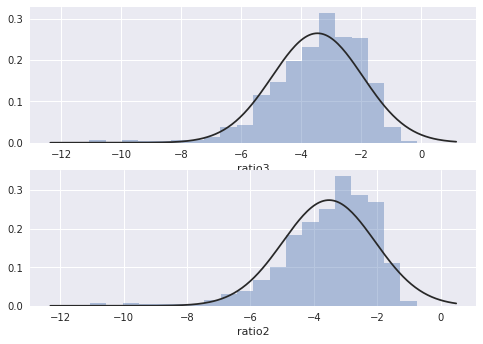

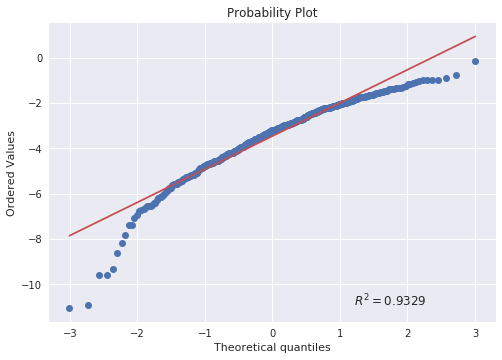

NormaltestResult(statistic=127.50153334674566, pvalue=2.0577557155934129e-28)

In [4]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_color_codes()
res = pd.DataFrame(res)
#print res
#print res.budget
f, axarr = plt.subplots(2, sharex=False)
#sns.distplot(res['ratio'], kde=0, rug=0, ax = axarr[0])
sns.distplot(np.log(res['ratio3']), kde=0, rug=0, ax = axarr[0],bins = 20, fit = sp.stats.norm)
#print res
#result = sns.regplot(x="dom", y="kr", data=res, ax = axarr[1])
sns.distplot(np.log(res['ratio2']), kde=0, rug=0, ax = axarr[1],bins = 20, fit = sp.stats.norm)
plt.show()
sp.stats.probplot(np.log(res['ratio3']), plot = plt, rvalue=1)
plt.show()
sp.stats.normaltest(np.log(res['ratio3']))

In [5]:
np.random.seed(0)
N1 = len(res['ratio3'])
x2 = np.log(res['ratio3'])
x2 -= x2.mean()
x2 /= x2.std()
print sp.stats.chisquare(x2)
#x1 = sp.stats.chisquare(x2.mean(),x2.std()).rvs(N1*100)
#sns.distplot(x1)
#sns.distplot(x2)
#plt.show()

Power_divergenceResult(statistic=1.2009007982748175e+18, pvalue=0.0)


(array([   0.,    0.,   31.,  320.,  154.,   15.]),
 array([  0,  30,  60,  90, 120, 150, 180]),
 <a list of 6 Patch objects>)

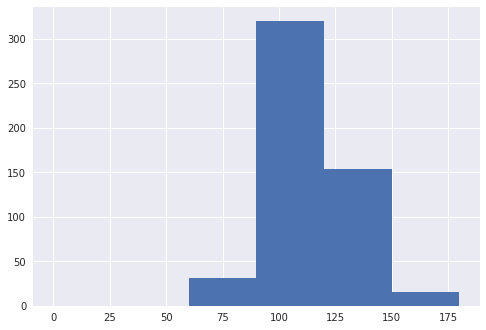

In [6]:
plt.hist(res['runtime'],bins=[0,30,60,90,120,150,180])

In [ ]:
print len(res['runtime'])

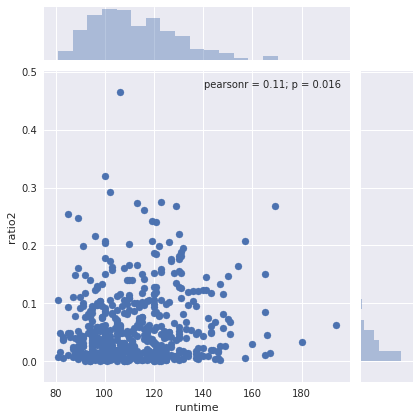

In [67]:
sns.jointplot(x="runtime", y="ratio2", data=res);
plt.xlim(30,200)
plt.show()

In [ ]:
plt.hist(res['runtime'])

In [22]:
quarter = (res['runtime'].max()-res['runtime'].min())/4
mini = res['runtime'].min()
maxi = res['runtime'].max()

res['Crt'] = pd.DataFrame((res['runtime'] - mini) / quarter, dtype = int)
res['Crt'][res['Crt'] == 4] = 3

/home/psj216/.local/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [ ]:
#sns.jointplot(x="Crt", y="kr", data=res)
res.boxplot("kr", "ratio")
#sns.violinplot(x = "Crt", y = "ratio", data = res)
plt.show()